In [1]:
#from sphedron.utils.ge import mask_land_nodes
from sphedron.utils.extra import get_mesh_landmask
from sphedron.utils.extra import plot_2d_mesh, plot_3d_mesh
from sphedron import Icosphere
from sphedron import NestedIcospheres
import sphedron as sph
import numpy as np

In [2]:
%%time
depth = 4
mesh = NestedIcospheres(factors=[1,2,2])
print(mesh)

Mesh has: #nodes: 162
          #faces: 420
          #edges: 1260
          #edges_unique: 630
          metadata: {'depth': [1, 2, 4], 'factor': [1, 2, 2]}
CPU times: user 7.1 ms, sys: 6 μs, total: 7.11 ms
Wall time: 6.47 ms


In [3]:
edges = mesh.nodes[mesh.edges]

Mesh has: #nodes: 42
          #faces: 80
          #edges: 240
          #edges_unique: 120
          metadata: {'factor': 2}


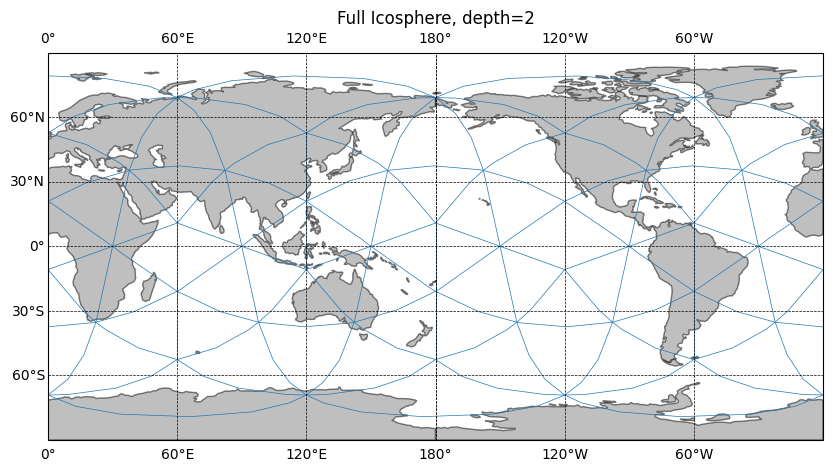

In [4]:
mesh1 = Icosphere.from_base(refine_factor=2)
print(mesh1)
plot_2d_mesh(mesh1, title=f"Full Icosphere, depth={mesh1._metadata['factor']}", scatter=False)

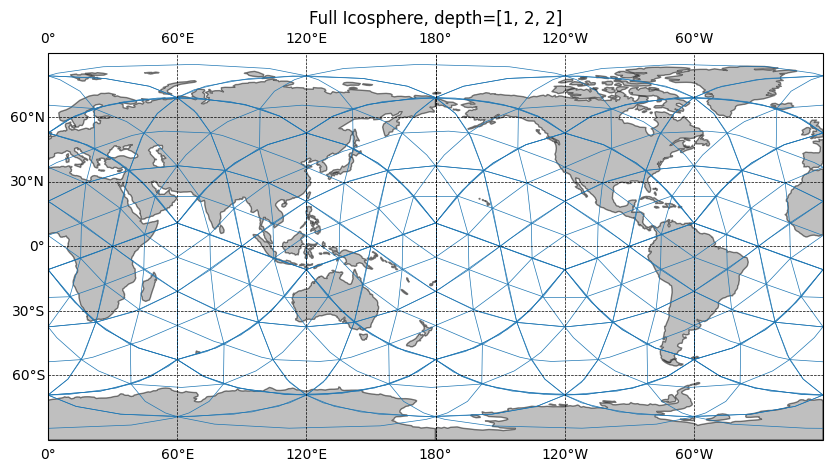

In [5]:
plot_2d_mesh(mesh, title=f"Full Icosphere, depth={mesh._metadata['factor']}", scatter=False)

Mesh has: #nodes: 162
          #faces: 320
          #edges: 960
          #edges_unique: 480
          metadata: {'factor': 2}


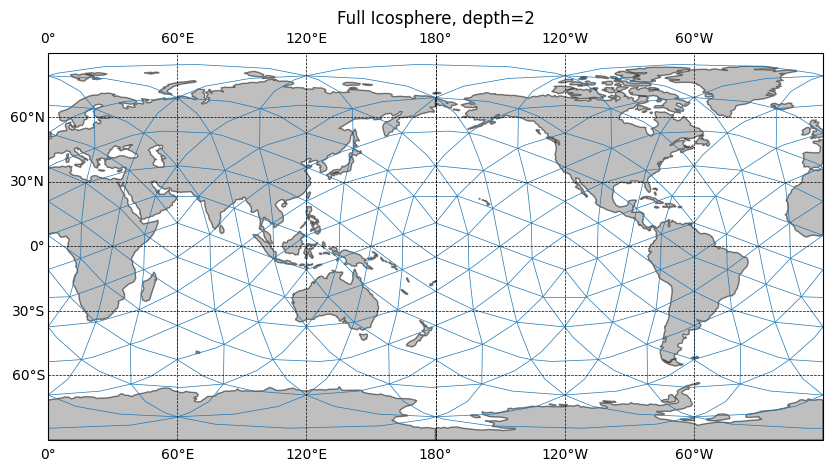

In [6]:
mesh2 =Icosphere.from_graph(refine_factor=2, base_nodes=mesh1.nodes, base_faces=mesh1.faces)
print(mesh2)
plot_2d_mesh(mesh2, title=f"Full Icosphere, depth={mesh2._metadata['factor']}", scatter=False)

In [7]:
%%time
land_mask = get_mesh_landmask(mesh2)

CPU times: user 3.6 s, sys: 33.3 ms, total: 3.63 s
Wall time: 3.64 s


In [8]:
%%time
mesh2.mask_nodes(land_mask)

CPU times: user 63 μs, sys: 0 ns, total: 63 μs
Wall time: 65.8 μs


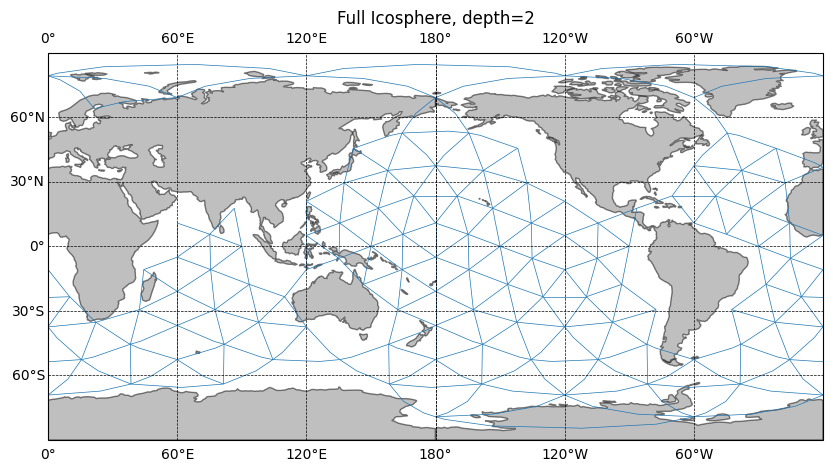

CPU times: user 273 ms, sys: 6.64 ms, total: 280 ms
Wall time: 280 ms


In [9]:
%%time
plot_2d_mesh(mesh2, title=f"Full Icosphere, depth={mesh2._metadata['factor']}", scatter=False)

In [10]:
%%time
meshes = NestedIcospheres(factors=[1,2,2,2,2,2])

CPU times: user 164 ms, sys: 17 μs, total: 164 ms
Wall time: 164 ms


In [11]:
print(meshes)

Mesh has: #nodes: 10242
          #faces: 27300
          #edges: 81900
          #edges_unique: 40950
          metadata: {'depth': [1, 2, 4, 8, 16, 32], 'factor': [1, 2, 2, 2, 2, 2]}


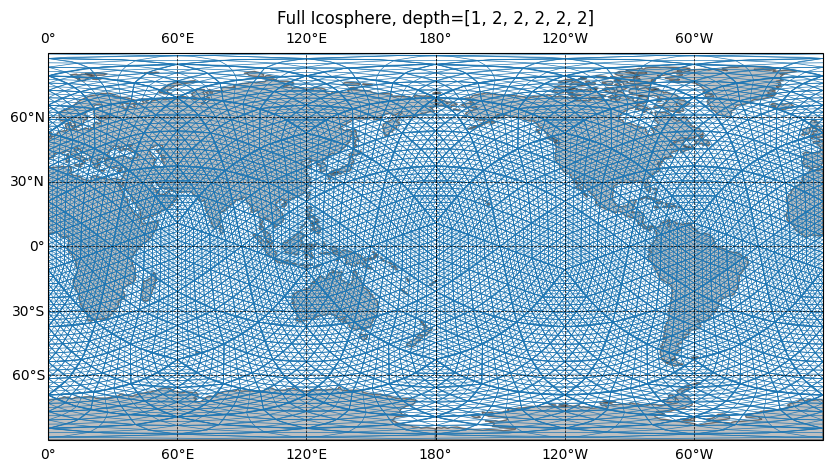

CPU times: user 10.8 s, sys: 46.5 ms, total: 10.8 s
Wall time: 10.9 s


In [12]:
%%time
plot_2d_mesh(meshes, title=f"Full Icosphere, depth={meshes._metadata['factor']}", scatter=False)

In [15]:
%%time
mask = get_mesh_landmask(meshes)
mask.shape

CPU times: user 3.2 s, sys: 13.3 ms, total: 3.21 s
Wall time: 3.21 s


(10242,)

In [16]:
%%time
meshes.mask_nodes(mask)

CPU times: user 919 μs, sys: 9 μs, total: 928 μs
Wall time: 1.06 ms


In [17]:
print(meshes)

Mesh has: #nodes: 7291
          #faces: 17630
          #edges: 54806
          #edges_unique: 27403
          metadata: {'depth': [1, 2, 4, 8, 16, 32], 'factor': [1, 2, 2, 2, 2, 2]}


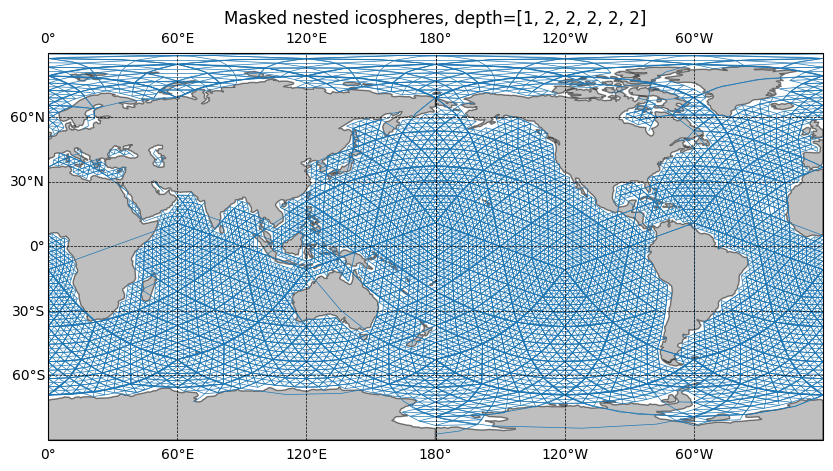

CPU times: user 6.66 s, sys: 3.41 ms, total: 6.66 s
Wall time: 6.67 s


In [18]:
%%time
plot_2d_mesh(meshes, title=f"Masked nested icospheres, depth={meshes._metadata['factor']}", scatter=False)

In [5]:
from sphedron.mesh_transfer import MeshTransfer
from sphedron.mesh import UniformMesh

In [6]:
uni_mesh = UniformMesh()
sender_mesh = UniformMesh()

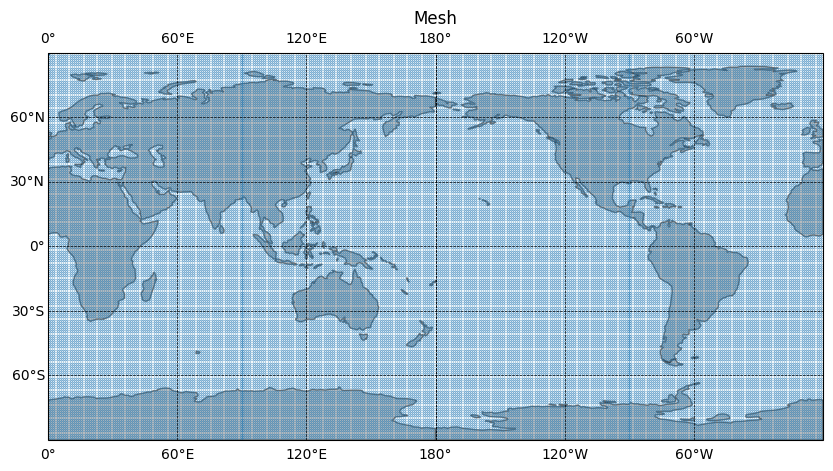

In [7]:
plot_2d_mesh(uni_mesh, scatter=True)

In [8]:
sender_mesh.mask_nodes(get_mesh_landmask(sender_mesh))

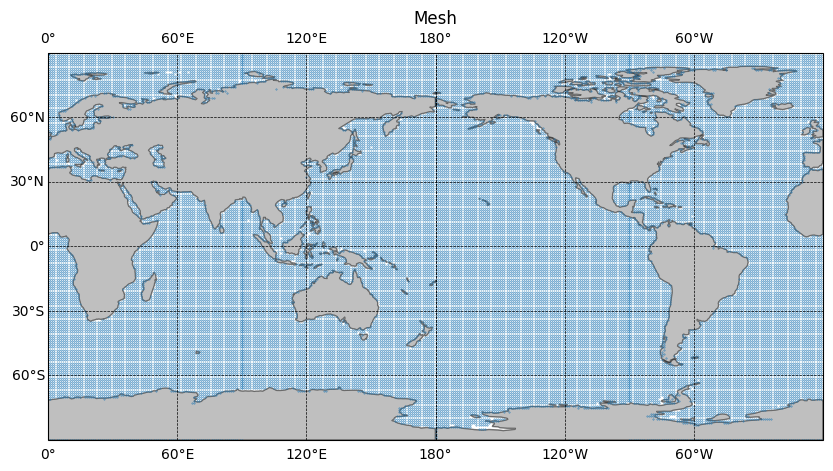

In [9]:
plot_2d_mesh(sender_mesh, scatter=True)

In [10]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib.colors import Normalize, TwoSlopeNorm
from cartopy import feature, util
import numpy as np


def cartplot_uniform_grid(
    uniform_values,
    lat_linspace,
    long_linspace,
    title,
    figsize=(18, 9),
    cover_land=True,
    unit="cm",
):
    resolution=110
    assert uniform_values.shape[0] == lat_linspace.shape[0]
    assert uniform_values.shape[1] == long_linspace.shape[0]
    plt.figure(figsize=figsize)
    cyclic_map, cyclic_long = util.add_cyclic_point(uniform_values, long_linspace)
    ax = plt.axes(projection=ccrs.PlateCarree())
    v_min = cyclic_map.min()
    v_max = cyclic_map.max()
    ax.set_global()
    ax.coastlines(resolution=f"{resolution}m", linewidth=1)
    ax.gridlines(linestyle="--", color="black")


    levels = np.linspace(v_min, v_max, 60)
    resolution = 110
    plt.title(title)
    plt.contourf(
        cyclic_long,
        lat_linspace,
        cyclic_map,
        levels=levels,
        transform=ccrs.PlateCarree(),
        corner_mask=True,
        cmap="coolwarm",
        antialiased=False,
        # mask=mask,
    )
    if cover_land:
        ax.add_feature(feature.LAND, facecolor="white", zorder=10)
    ax.coastlines(resolution=f"{resolution}m", linewidth=1)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label(unit, size=12, rotation=0, labelpad=15)
    cb.ax.tick_params(labelsize=12)

    plt.show()

In [11]:
from sphedron.utils.transform import xyz_to_thetaphi
sender_thetaphi = xyz_to_thetaphi(sender_mesh.nodes)
sender_values = np.cos(sender_thetaphi[:,0]*5) * np.cos(sender_thetaphi[:,1]*4)

In [44]:
sender_uni_transfer = MeshTransfer(sender_mesh=sender_mesh, receiver_mesh=uni_mesh, n_neighbors=1)

In [13]:
s2r_edges = sender_mesh.query_edges_from_neighbors(uni_mesh, n_neighbors=1)

TypeError: object of type 'numpy.int64' has no len()

In [ ]:
values = sender_uni_transfer.transfer(sender_values)

In [ ]:
print(values.shape)

In [31]:
vals = values.reshape(uni_mesh.uniform_lat.shape[0], uni_mesh.uniform_long.shape[0])

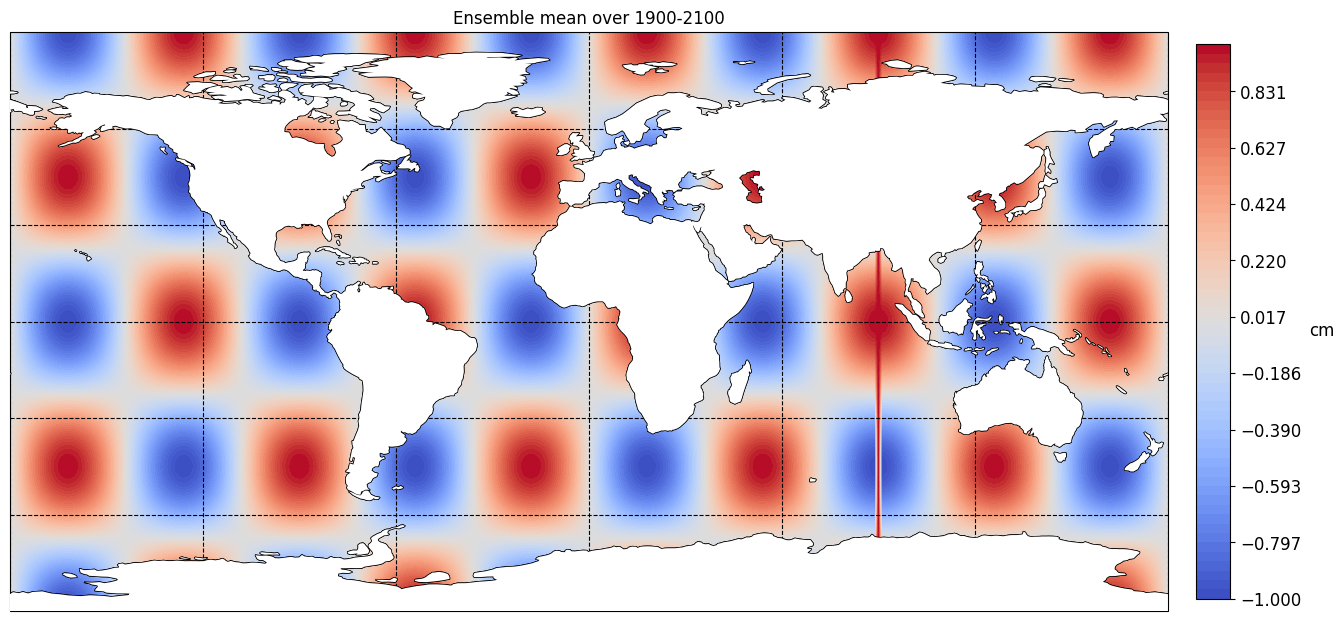

In [32]:
cartplot_uniform_grid(vals, uni_mesh.uniform_lat, uni_mesh.uniform_long, "Ensemble mean over 1900-2100")

In [ ]:
plt.matshow(

In [10]:
edges = mesh2.nodes[mesh2.edges]

In [11]:
idx = transfer_mesh(mesh.vertices, latlong_to_xyz(np.array([[0, 180]])), radius=0.01)[0][0]
vertices_mask = np.zeros(mesh.num_vertices).astype(bool)
vertices_mask[idx]=True
mesh.exclude_vertices(vertices_mask)

In [16]:
mesh

Mesh has:                
	 #vertices: 6753                
	 #faces: 16187,                
	 #edges: 48561,                
	 #edges_unique: 25208,                
	meta: {'depths': array([ 1,  2,  4,  8, 16, 32])}

In [5]:
%matplotlib notebook
plot_3d_mesh(mesh, title="Mesh")

<IPython.core.display.Javascript object>

In [4]:
from sphedron.mesh import VerticesOnlyMesh
#from icomesh.transfers import MeshTransfer
mesh0 = VerticesOnlyMesh(np.array(np.meshgrid(np.arange(-90,91,2), np.arange(-180,180,2))).transpose(2,1,0).reshape(-1,2))
#transfer = MeshTransfer({"base":mesh, 0:mesh0}, n_neighbors=1)
#transfer.get_neighbors("base", 0)
print(mesh0)

Mesh has:                
	 #vertices: 16380                
	 #faces: 16380,                
	 #edges: 32760,                
	 #edges_unique: 16380,                
	meta: {}


In [42]:
mesh.all_faces[0]

(1,
 array([[ 0,  1,  4],
        [ 0,  2,  3],
        [ 0,  3,  5],
        [ 0,  2,  4],
        [ 0,  1,  5],
        [ 1,  5,  8],
        [ 1,  8,  9],
        [ 2,  4, 11],
        [ 2,  7, 11],
        [ 3,  2,  7],
        [ 3,  7, 10],
        [ 4,  1,  9],
        [ 4,  9, 11],
        [ 5,  3, 10],
        [ 5,  8, 10],
        [ 7,  6, 11],
        [ 8,  6, 10],
        [ 9,  6,  8],
        [10,  6,  7],
        [11,  6,  9]]))

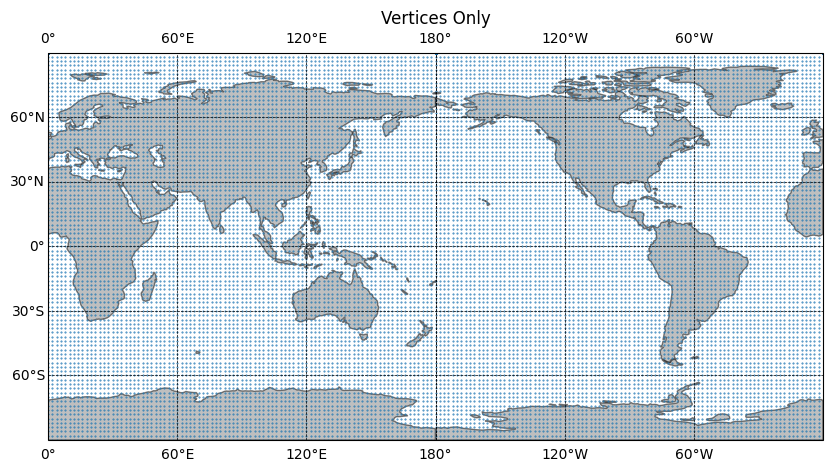

In [5]:
plot_2d_mesh(mesh0,title="Vertices Only",scatter=True,s=0.2)

In [6]:
from sphedron.utils.geo import mask_land_vertices

In [7]:
%%time
mask_land_vertices(mesh)
#print("After masking the land vertices:", mesh)

CPU times: user 3.58 s, sys: 140 ms, total: 3.72 s
Wall time: 3.73 s


Mesh has:                
	 #vertices: 116                
	 #faces: 214,                
	 #edges: 642,                
	 #edges_unique: 370,                
	meta: {'depths': array([1, 2, 4])}

In [48]:
from sphedron.utils.mesh import compute_edges_lenghts
from sphedron.mesh import Mesh
m  = Mesh(mesh._all_vertices, mesh.all_faces[-1][1])

In [51]:
compute_edges_lenghts(m.vertices, m.edges_unique.T).mean()

np.float64(0.03776637041792052)

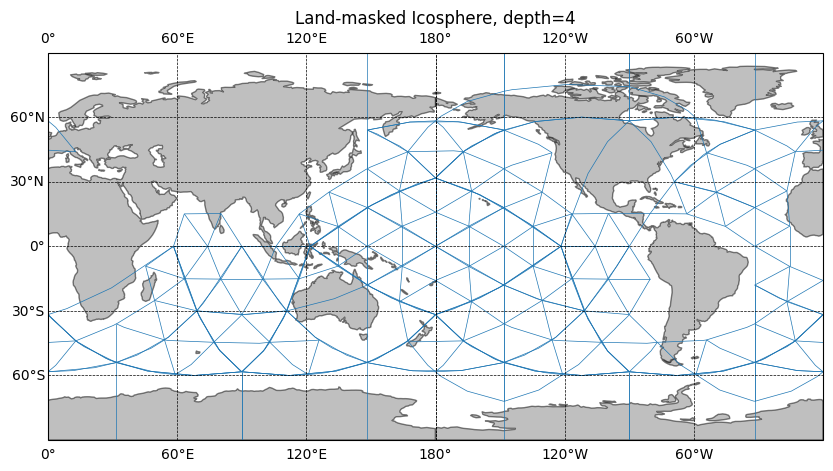

In [8]:
plot_2d_mesh(mesh, title=f"Land-masked Icosphere, depth={depth}")

In [9]:
%%time
depth = 32
mesh = Icosphere(depth=depth)
print(mesh)

Mesh has:                
	 #vertices: 10242                
	 #faces: 20480,                
	 #edges: 61440,                
	 #edges_unique: 30720,                
	meta: {'compute time (ms)': 24.384021759033203, 'depth': 32}
CPU times: user 66.3 ms, sys: 8.52 ms, total: 74.8 ms
Wall time: 91.5 ms


In [10]:
mesh.vertices.shape

(10242, 3)

In [11]:
%%time
mask_land_vertices(mesh)
print(mesh)

Mesh has:                
	 #vertices: 7261                
	 #faces: 13506,                
	 #edges: 40518,                
	 #edges_unique: 20778,                
	meta: {'compute time (ms)': 24.384021759033203, 'depth': 32}
CPU times: user 3.73 s, sys: 183 ms, total: 3.91 s
Wall time: 3.93 s


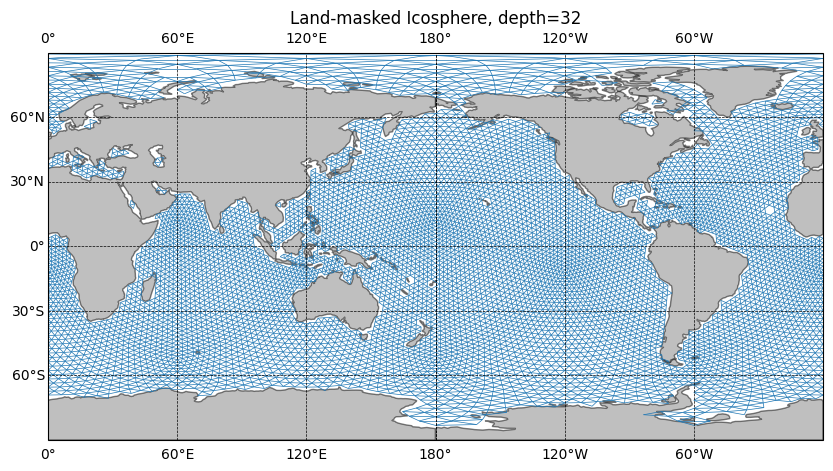

In [12]:
plot_2d_mesh(mesh, title=f"Land-masked Icosphere, depth={depth}")

In [13]:
rounds = 10
j = 100
vertices_neighs = {}
for edge in mesh.edges_symmetric:
    i,j = int(edge[0]),int(edge[1])
    if i not in vertices_neighs:
        vertices_neighs[i]=[]
    vertices_neighs[i].append(j)
print(mesh.vertices_latlong[j])
neighs = set([j])
for _ in range(rounds):
    new_neighs = set()
    for n in neighs:
        new_neighs.update(list(vertices_neighs[n]))
    neighs.update(new_neighs)
neighs=list(neighs)
edges = []
for i in neighs:
    edges.extend([[i,k] for k in vertices_neighs[i]])
edges = np.array(edges)
edges = np.unique(np.sort(edges,axis=1),axis=0)
print(edges.shape)

[  6.91568512 -58.38605003]
(458, 2)


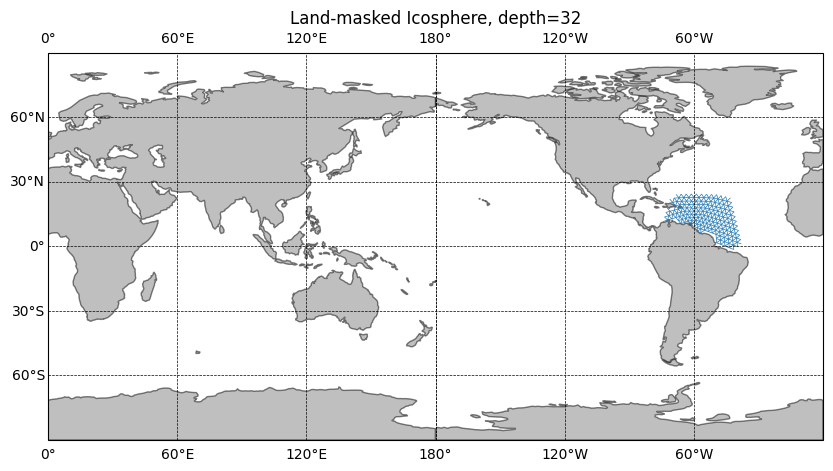

In [14]:
plot_2d_mesh(mesh,edges=edges, title=f"Land-masked Icosphere, depth={depth}")

## Neighbor propagation



In [28]:
mesh = StratifiedIcospheres(depths=[1,2])
print(mesh)
#mesh.mask_land_vertices()
print(mesh)

Mesh has:
	 #vertices: 42                
	 #faces: 100,                
	 #edges: 150,                
	meta: {'depths': [1, 2]}
Mesh has:
	 #vertices: 42                
	 #faces: 100,                
	 #edges: 150,                
	meta: {'depths': [1, 2]}


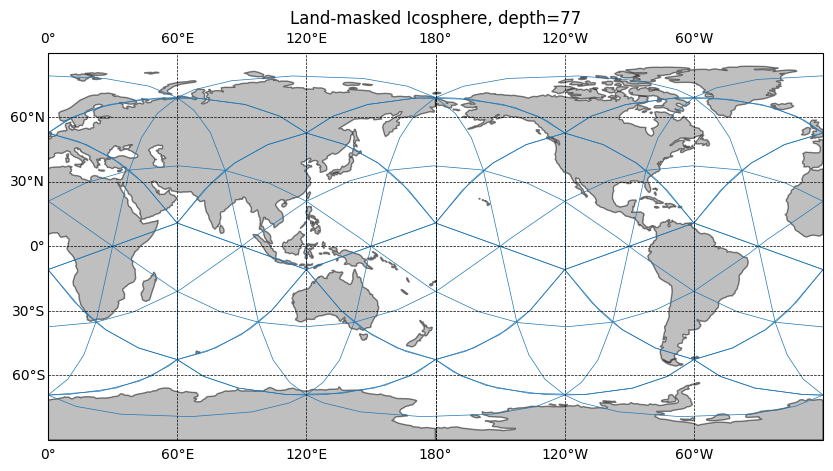

In [29]:
plot_2d_mesh(
    mesh.vertices_latlong, mesh.edges, title=f"Land-masked Icosphere, depth={depth}"
)

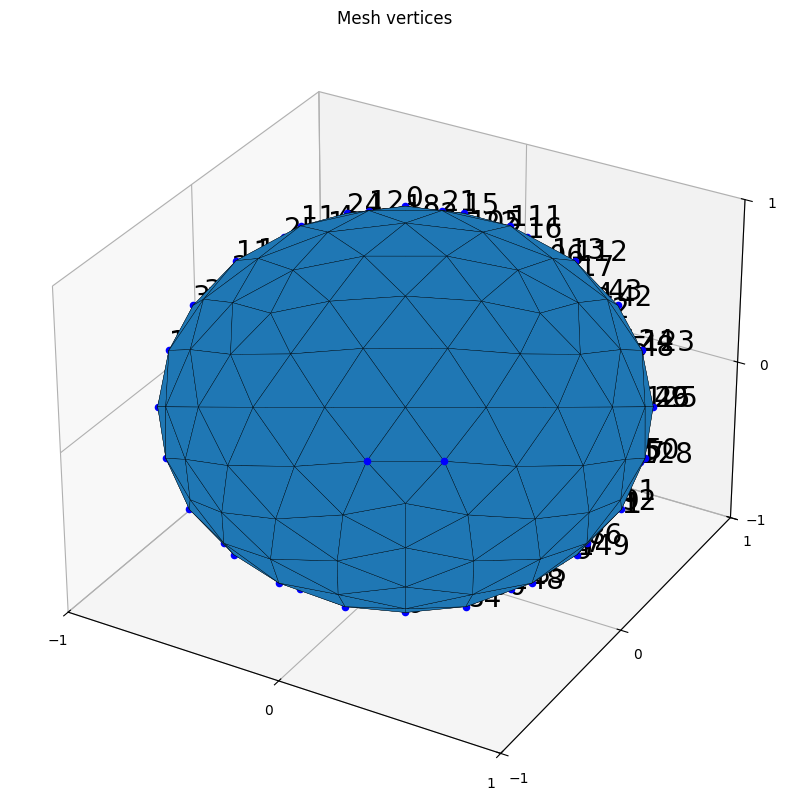

In [15]:
#def plot_vertices(
#    mesh: Mesh,
depth = 4
mesh = Icosphere(depth=depth)
title="Mesh vertices"
figsize=(15, 10)
#):

fig = plt.figure(figsize=figsize)
poly = Poly3DCollection(mesh.vertices[mesh.faces])

poly.set_edgecolor("black")
poly.set_linewidth(0.25)

ax = fig.add_subplot(projection="3d")
ax.add_collection3d(poly)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
for i, m in enumerate(mesh.vertices):  # plot each point + it's index as text above
    ax.scatter(m[0], m[1], m[2], color="b")
    ax.text(m[0], m[1], m[2], str(i), size=20, zorder=10, color="k")
    ax.set_title(title)

plt.show()
plt.close()


In [42]:
rounds = 12
j = 100
vertices_neighs = {}
for edge in mesh.symmetric_edges.T:
    i,j = int(edge[0]),int(edge[1])
    if i not in vertices_neighs:
        vertices_neighs[i]=[]
    vertices_neighs[i].append(j)
print(mesh.vertices_latlong[j])
neighs = set([j])
for _ in range(rounds):
    new_neighs = set()
    for n in neighs:
        new_neighs.update(list(vertices_neighs[n]))
    neighs.update(new_neighs)
neighs=list(neighs)
edges = []
for i in neighs:
    edges.extend([[i,k] for k in vertices_neighs[i]])
edges = np.array(edges)
edges = np.unique(np.sort(edges,axis=1),axis=0)
print(edges.shape)

[-38.20396895 -18.93003542]
(113338, 2)


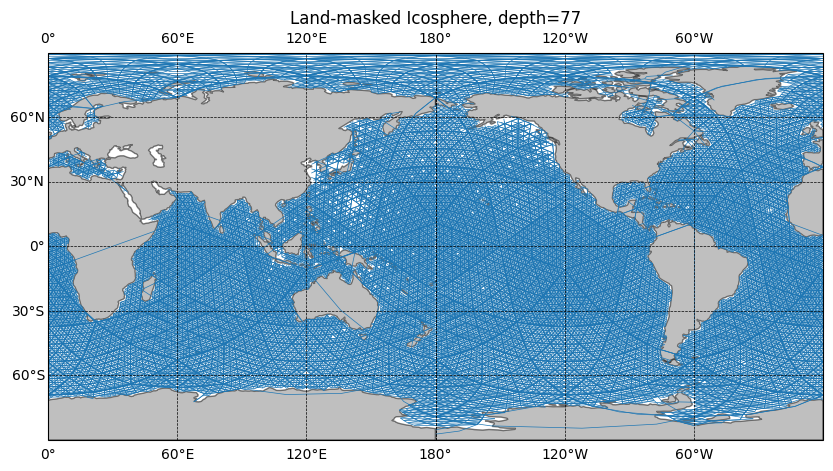

In [43]:
plot_2d_mesh(
    mesh.vertices_latlong, edges.T, title=f"Land-masked Icosphere, depth={depth}"
)

In [12]:
mesh.vertices_latlong[100]

array([-173.42320347,   19.30123022])

In [ ]:
lons = np.sort(np.random.uniform(-180,180,360))
lats = np.sort(np.random.uniform(-90,90,180))
lons_mesh, lats_mesh = np.meshgrid(lons,lats)
random_latlong = np.array([lons_mesh,lats_mesh]).reshape(2,-1).T
print(lons_mesh.shape)
values = np.cos((lats_mesh/90+0.5)*np.pi*2)*np.sin(lons_mesh/180*np.pi*2)

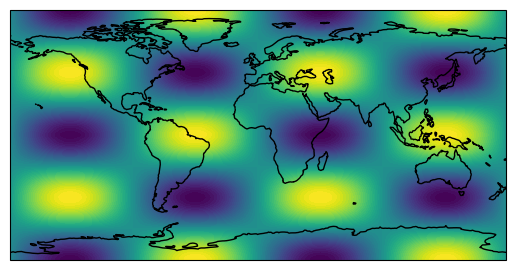

In [11]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, values, 60,
             transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

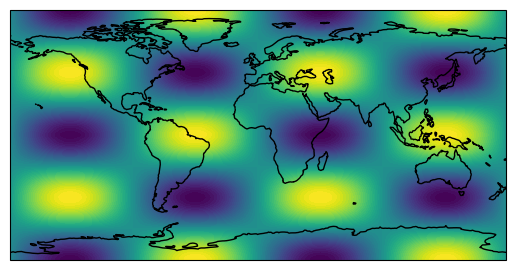

In [12]:
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons_mesh, lats_mesh, values, 60,
             transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [13]:
from icomesh.mesh import VerticesOnlyMesh
from icomesh.mesh import UniformMesh
from icomesh.transfers import MeshTransfer

In [14]:
random_mesh = VerticesOnlyMesh(random_latlong)
uniform_mesh = UniformMesh()

In [26]:
transfer = MeshTransfer({"random":random_mesh, "uniform":uniform_mesh}, n_neighbors=3)

In [27]:
uniform_vals = transfer.transfer("random", "uniform", values.reshape(-1))

In [28]:
uniform_vals.reshape(181,360)

array([[-0.61302562, -0.61302562, -0.61302562, ..., -0.61302562,
        -0.61302562, -0.61302562],
       [-0.0247767 , -0.04972173, -0.07765703, ...,  0.10321122,
         0.07901543,  0.04178737],
       [-0.0246321 , -0.04943155, -0.07720382, ...,  0.10260887,
         0.07855429,  0.0415435 ],
       ...,
       [-0.02468348, -0.04953467, -0.07736487, ...,  0.10282292,
         0.07871816,  0.04163016],
       [-0.02479168, -0.04975179, -0.07770399, ...,  0.10327363,
         0.07906321,  0.04181264],
       [-0.34288235, -0.34288235, -0.34288235, ..., -0.34288235,
        -0.34288235, -0.34288235]])

In [15]:
uniform_mesh.uniform_lat

array([-90., -89., -88., -87., -86., -85., -84., -83., -82., -81., -80.,
       -79., -78., -77., -76., -75., -74., -73., -72., -71., -70., -69.,
       -68., -67., -66., -65., -64., -63., -62., -61., -60., -59., -58.,
       -57., -56., -55., -54., -53., -52., -51., -50., -49., -48., -47.,
       -46., -45., -44., -43., -42., -41., -40., -39., -38., -37., -36.,
       -35., -34., -33., -32., -31., -30., -29., -28., -27., -26., -25.,
       -24., -23., -22., -21., -20., -19., -18., -17., -16., -15., -14.,
       -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
        -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,
        20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,
        31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
        42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
        53.,  54.,  55.,  56.,  57.,  58.,  59.,  6

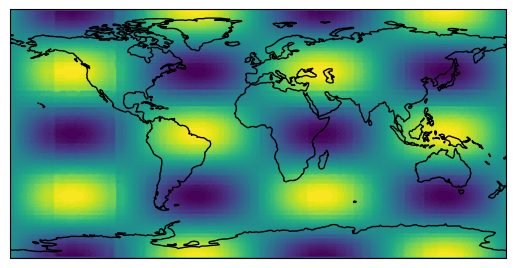

In [31]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(uniform_mesh.uniform_long, uniform_mesh.uniform_lat, uniform_vals.reshape(181,360), 60,
             transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()